In [2]:
#importing required libraries and loading the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("indian_liver_patient - indian_liver_patient.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull().sum() #checking for null values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
#filling with mean value:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

C:\Users\KARTHICK\AppData\Local\Temp\ipykernel_10628\1268198636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


C:\Users\KARTHICK\AppData\Local\Temp\ipykernel_10628\1600433540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dataset', palette='Set2')


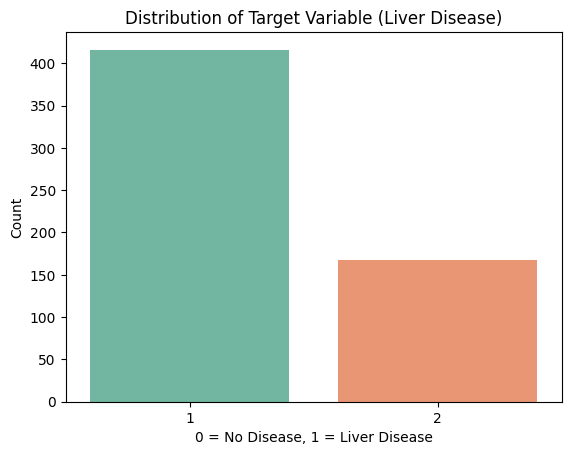

In [6]:
sns.countplot(data=df, x='Dataset', palette='Set2')
plt.title('Distribution of Target Variable (Liver Disease)')
plt.xlabel('0 = No Disease, 1 = Liver Disease')
plt.ylabel('Count')
plt.show()


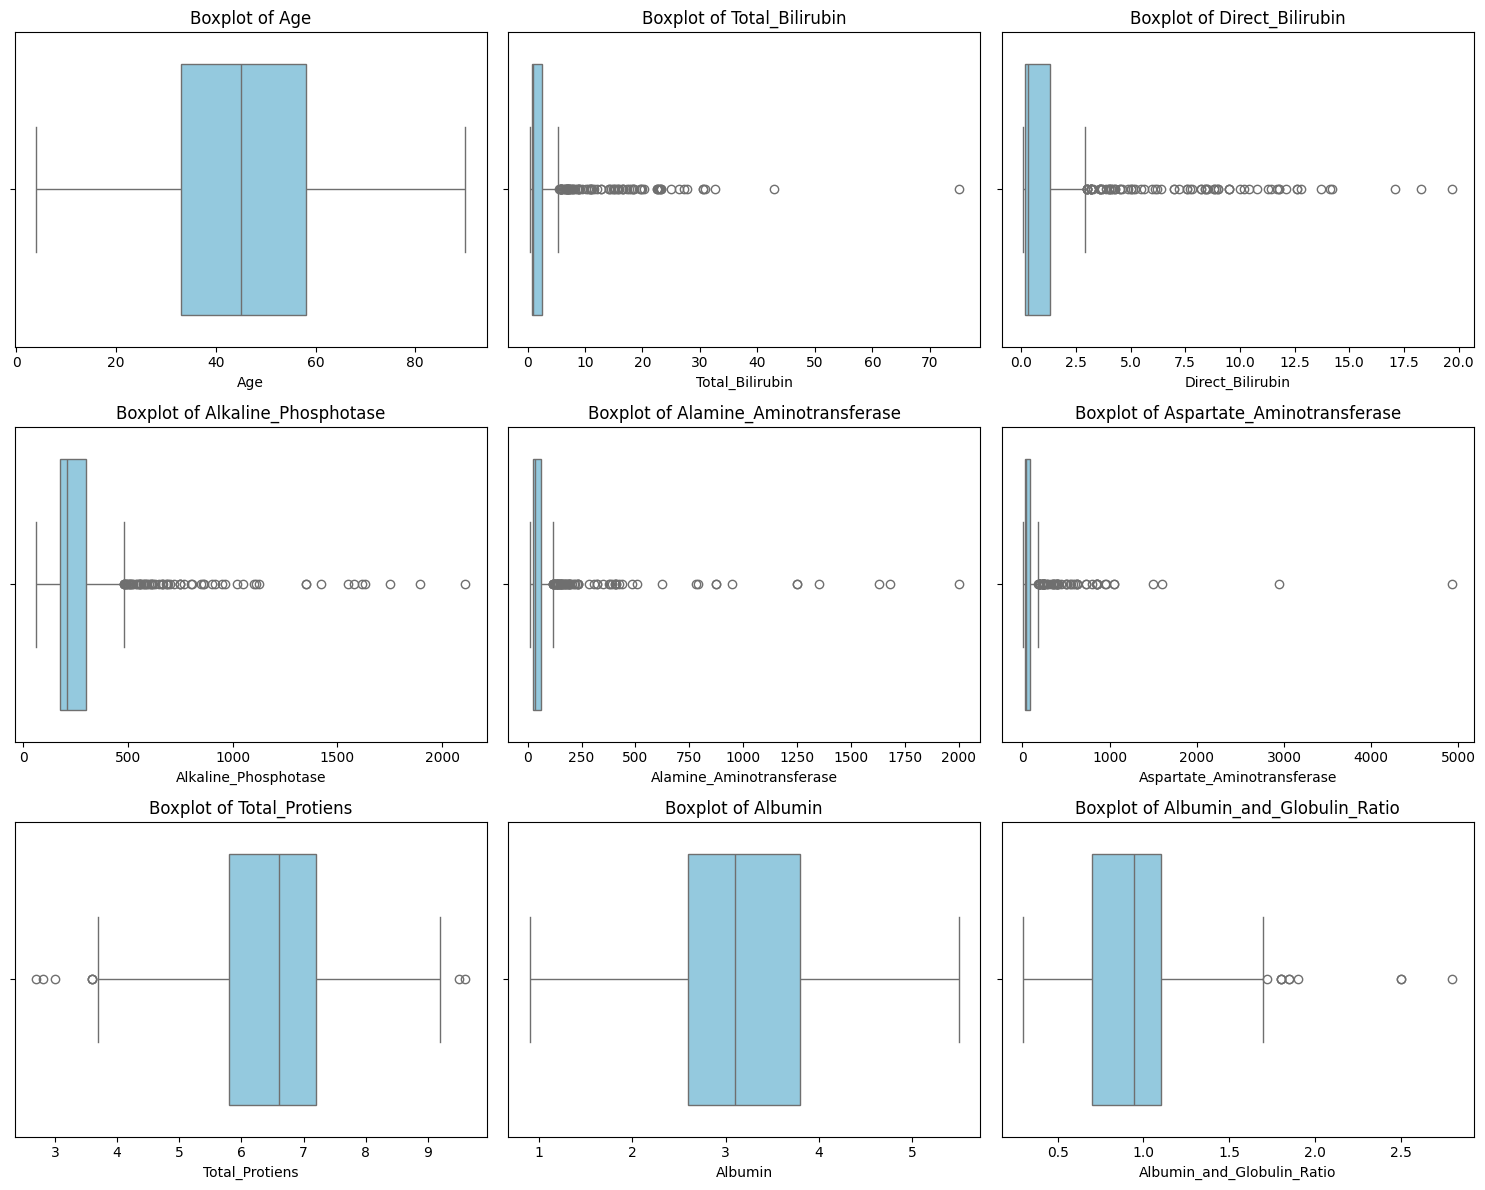

In [7]:
numerical_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                  'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                  'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                  'Albumin_and_Globulin_Ratio']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [8]:
df['Target'] = df['Dataset'].map({1: 1, 2: 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.drop('Dataset', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [10]:
x = df.drop('Target', axis=1)
y = df['Target']

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_resampled)
X_test_scaled = scaler.transform(x_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_resampled)

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6752136752136753
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.32      0.37        34
           1       0.75      0.82      0.78        83

    accuracy                           0.68       117
   macro avg       0.59      0.57      0.57       117
weighted avg       0.65      0.68      0.66       117

Confusion Matrix:
 [[11 23]
 [15 68]]


In [13]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train_scaled, y_train_resampled)
y_pred = xgb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7094017094017094
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        34
           1       0.78      0.83      0.80        83

    accuracy                           0.71       117
   macro avg       0.64      0.62      0.63       117
weighted avg       0.70      0.71      0.70       117

Confusion Matrix:
 [[14 20]
 [14 69]]


c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:01:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
# Hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Randomized Search CV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',  
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train_scaled, y_train_resampled)

print("Best Parameters:", xgb_random.best_params_)
print("Best CV Score:", xgb_random.best_score_)

best_xgb = xgb_random.best_estimator_
y_pred_best = best_xgb.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'colsample_bytree': np.float64(0.637469907131237), 'gamma': np.float64(0.18385790152971676), 'learning_rate': np.float64(0.08956071030451762), 'max_depth': 8, 'n_estimators': 257, 'subsample': np.float64(0.9892042219009782)}
Best CV Score: 0.8244080350129053
Test Accuracy: 0.7008547008547008
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.32      0.39        34
           1       0.76      0.86      0.80        83

    accuracy                           0.70       117
   macro avg       0.62      0.59      0.59       117
weighted avg       0.67      0.70      0.68       117

Confusion Matrix:
 [[11 23]
 [12 71]]


c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:01:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(3, 10, 1),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'gamma': np.linspace(0, 0.5, 10)
}

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# RandomizedSearchCV with f1_weighted
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_weighted',   # <-- Changed from accuracy to f1_weighted
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


xgb_random.fit(X_train_scaled, y_train_resampled)

best_xgb = xgb_random.best_estimator_


y_pred = best_xgb.predict(X_test_scaled)

print("Best Parameters:", xgb_random.best_params_)
print("Best CV f1_weighted Score:", xgb_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': np.float64(0.9444444444444444), 'n_estimators': np.int64(200), 'max_depth': np.int64(9), 'learning_rate': np.float64(0.20333333333333334), 'gamma': np.float64(0.5), 'colsample_bytree': np.float64(0.5555555555555556)}
Best CV f1_weighted Score: 0.8179140867419757
Test Accuracy: 0.7094017094017094
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        34
           1       0.78      0.83      0.80        83

    accuracy                           0.71       117
   macro avg       0.64      0.62      0.63       117
weighted avg       0.70      0.71      0.70       117

Confusion Matrix:
 [[14 20]
 [14 69]]


c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting classifier

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
# Defining base models
rf_clf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=9)
xgb_clf = XGBClassifier(
    n_estimators=200, max_depth=9, learning_rate=0.2,
    subsample=0.9, colsample_bytree=0.6, gamma=0.5,
    random_state=42, eval_metric="logloss", use_label_encoder=False
)
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=200, max_depth=3)
lr_clf=LogisticRegression(max_iter=1000, random_state=42)

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('gb', gb_clf),
        ('lr', lr_clf)
    ],
    voting='soft',  
    n_jobs=-1
)


voting_clf.fit(X_train_scaled, y_train_resampled)

y_pred_voting = voting_clf.predict(X_test_scaled)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.44      0.45        34
           1       0.78      0.80      0.79        83

    accuracy                           0.69       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.69      0.69      0.69       117


Confusion Matrix:
 [[15 19]
 [17 66]]


In [17]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(
    objective="binary",
    random_state=42,
    class_weight="balanced"  # handles imbalance
)

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(3, 12, 1),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'num_leaves': np.arange(20, 150, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# RandomizedSearchCV
lgb_random = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_weighted",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

lgb_random.fit(X_train_scaled, y_train_resampled)

best_lgb = lgb_random.best_estimator_

y_pred = best_lgb.predict(X_test_scaled)

print("Best Parameters:", lgb_random.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 333, number of negative: 333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 666, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [18]:
y_proba = best_lgb.predict_proba(X_test_scaled)[:,1]
threshold = 0.45
y_pred = (y_proba >= threshold).astype(int)

c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [19]:
print("Best Parameters:", lgb_random.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'subsample': np.float64(0.6), 'num_leaves': np.int64(40), 'n_estimators': np.int64(100), 'max_depth': np.int64(10), 'learning_rate': np.float64(0.2677777777777778), 'colsample_bytree': np.float64(0.6)}
Test Accuracy: 0.7094017094017094
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.37        34
           1       0.75      0.88      0.81        83

    accuracy                           0.71       117
   macro avg       0.63      0.59      0.59       117
weighted avg       0.68      0.71      0.68       117

Confusion Matrix:
 [[10 24]
 [10 73]]


In [20]:
lgb_clf = lgb.LGBMClassifier(
    objective="binary",
    random_state=42,
    class_weight="balanced"
)

param_dist = {
    'n_estimators': np.arange(300, 500, 50),
    'max_depth': np.arange(12, 16, 1),
    'learning_rate': np.linspace(0.05, 0.1, 6),
    'num_leaves': np.arange(60, 100, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

lgb_random = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_weighted",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

lgb_random.fit(X_train_scaled, y_train_resampled)
best_lgb = lgb_random.best_estimator_

y_proba = best_lgb.predict_proba(X_test_scaled)[:,1]
threshold = 0.35
y_pred = (y_proba >= threshold).astype(int)

print("Best Parameters:", lgb_random.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[LightGBM] [Info] Number of positive: 333, number of negative: 333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 666, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [21]:
df2=df.copy()

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [23]:
x = df2.drop('Target', axis=1)
y = df2['Target']

In [24]:
#RAndom oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

In [25]:
print("After oversampling class distribution:\n", pd.Series(y_resampled).value_counts())

After oversampling class distribution:
 Target
1    416
0    416
Name: count, dtype: int64


In [26]:
x_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [27]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(X_test)

In [28]:
#LightGBM Classifier
lgb_clf = lgb.LGBMClassifier(
    objective="binary",
    random_state=42,
    n_estimators=350,
    learning_rate=0.07,
    max_depth=14,
    num_leaves=70,
    subsample=0.8,
    colsample_bytree=0.7
)

lgb_clf.fit(x_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 333, number of negative: 332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500752 -> initscore=0.003008
[LightGBM] [Info] Start training from score 0.003008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.07, max_depth=14,
               n_estimators=350, num_leaves=70, objective='binary',
               random_state=42, subsample=0.8)

In [ ]:
#Predictions
y_proba = lgb_clf.predict_proba(x_test_scaled)[:,1]
threshold = 0.5 
y_pred = (y_proba >= threshold).astype(int)

c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Evaluation(test data)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90        84
           1       0.97      0.81      0.88        83

    accuracy                           0.89       167
   macro avg       0.90      0.89      0.89       167
weighted avg       0.90      0.89      0.89       167

Confusion Matrix:
 [[82  2]
 [16 67]]


In [34]:
#evaluation(train data)
y_train_proba = lgb_clf.predict_proba(x_train_scaled)[:,1]
y_train_pred = (y_train_proba >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Training Data:")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))


Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

[[332   0]
 [  0 333]]


c:\Users\KARTHICK\OneDrive\Desktop\Mini Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [37]:
import pickle

with open("liver_model.pkl", "wb") as f:
    pickle.dump(lgb_clf , f)

with open("liver_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

gender_mapping = {'Male': 1, 'Female': 0}
with open('gender_mapping.pkl', 'wb') as f:
    pickle.dump(gender_mapping, f)

threshold = 0.5
with open('threshold.pkl', 'wb') as f:
    pickle.dump(threshold, f)
